In [1]:
%run ../convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Problem 1

Exercise: create a new DNN that reuses all the pretrained hidden layers of the previous model, freezes them, and replaces the softmax output layer with a new one.
    <hr>
    Exercise: train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision?

In [54]:
from keras.models import load_model, clone_model, Sequential
from keras.layers import Dense
from keras.datasets.mnist import load_data
from keras.callbacks import EarlyStopping

In [25]:
(X_train, y_train), (X_test, y_test) = load_data()
data = []
for num in range(5, 10):
    arr = X_train[y_train == num][:100]
    data.extend(list(zip(arr, [num] * len(arr))))
np.random.shuffle(data)

train = np.array([arr[0] for arr in data])
test = np.array([arr[1] for arr in data]) - 5 #shift label by -5 to use sparse_categorical_crossentropy

<img src = '../transfer_keras.png'/>

In [35]:
trained_model = load_model('mnist_0_4_batch.h5')

Freeze pretrained layers:

In [41]:
trained_model_clone = clone_model(trained_model)
trained_model_clone.set_weights(trained_model.get_weights())

model = Sequential(trained_model_clone.layers[:-1])
for layer in model.layers:
    layer.trainable = False
model.add(Dense(5, activation = 'softmax'))

In [42]:

model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])
%time history = model.fit(train, test, epochs = 50, batch_size = 32)

Epoch 1/50
500/500 [==============================] - 0s 302us/step - loss: 1.9869 - accuracy: 0.2480
Epoch 2/50
500/500 [==============================] - 0s 54us/step - loss: 1.7371 - accuracy: 0.2980
Epoch 3/50
500/500 [==============================] - 0s 62us/step - loss: 1.5094 - accuracy: 0.4020
Epoch 4/50
500/500 [==============================] - 0s 64us/step - loss: 1.3880 - accuracy: 0.4400
Epoch 5/50
500/500 [==============================] - 0s 64us/step - loss: 1.2953 - accuracy: 0.4740
Epoch 6/50
500/500 [==============================] - 0s 68us/step - loss: 1.1590 - accuracy: 0.5060
Epoch 7/50
500/500 [==============================] - 0s 68us/step - loss: 1.0985 - accuracy: 0.5920
Epoch 8/50
500/500 [==============================] - 0s 62us/step - loss: 1.0607 - accuracy: 0.5820
Epoch 9/50
500/500 [==============================] - 0s 62us/step - loss: 1.0346 - accuracy: 0.6100
Epoch 10/50
500/500 [==============================] - 0s 66us/step - loss: 0.9677 - accur

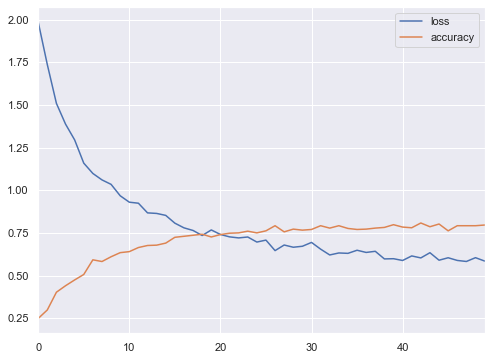

In [43]:
pd.DataFrame(history.history).plot(figsize = (8, 6))

# Problem 2

Exercise: try again reusing just four hidden layers instead of five. Can you achieve a higher precision?

In [61]:
trained_model1 = load_model('mnist_0_4.h5')
clone_model1 = clone_model(trained_model1)
clone_model1.set_weights(trained_model1.get_weights())

model1 = Sequential(clone_model1.layers)
len(model1.layers)
trained_model1.layers

In [62]:
for layer in trained_model1.layers[:-3]:
    layer.trainable = False
model1.compile('nadam', 'sparse_categorical_crossentropy', ['accuracy'])
early_cb = EarlyStopping(patience=10, restore_best_weights=True)
hist1 = model1.fit(train, test, epochs = 20, batch_size = 32, callbacks = [early_cb])

Epoch 1/20
500/500 [==============================] - 0s 604us/step - loss: 31.0064 - accuracy: 0.5140
Epoch 2/20
500/500 [==============================] - 0s 114us/step - loss: 4.0920 - accuracy: 0.8240
Epoch 3/20
500/500 [==============================] - 0s 124us/step - loss: 1.4321 - accuracy: 0.9200
Epoch 4/20
500/500 [==============================] - 0s 100us/step - loss: 0.7862 - accuracy: 0.9340
Epoch 5/20
 32/500 [>.............................] - ETA: 0s - loss: 0.4216 - accuracy: 0.9375

C:\Users\dell\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


500/500 [==============================] - 0s 100us/step - loss: 0.5878 - accuracy: 0.9540
Epoch 6/20
500/500 [==============================] - 0s 104us/step - loss: 0.7911 - accuracy: 0.9360
Epoch 7/20
500/500 [==============================] - 0s 96us/step - loss: 0.9134 - accuracy: 0.9400
Epoch 8/20
500/500 [==============================] - 0s 92us/step - loss: 0.4452 - accuracy: 0.9640
Epoch 9/20
500/500 [==============================] - 0s 94us/step - loss: 0.9050 - accuracy: 0.9460
Epoch 10/20
500/500 [==============================] - 0s 84us/step - loss: 1.0826 - accuracy: 0.9360
Epoch 11/20
500/500 [==============================] - 0s 82us/step - loss: 0.5440 - accuracy: 0.9520
Epoch 12/20
500/500 [==============================] - 0s 94us/step - loss: 1.0137 - accuracy: 0.9460
Epoch 13/20
500/500 [==============================] - 0s 92us/step - loss: 0.2504 - accuracy: 0.9820
Epoch 14/20
500/500 [==============================] - 0s 92us/step - loss: 0.6940 - accuracy: 0

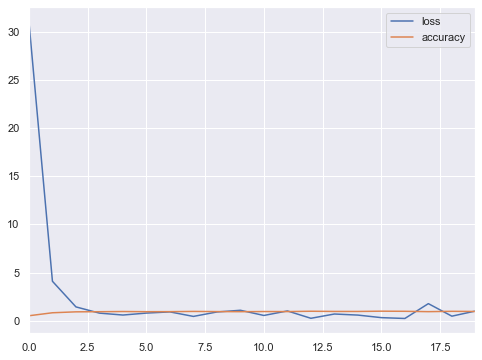

In [63]:
pd.DataFrame(hist1.history).plot(figsize = (8, 6))

# Pretrain on an auxiliary task